In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC

In [3]:
iris = load_iris()
X = iris['data'][:, (2,3)]
y = (iris['target'] == 2).astype(np.float64)

In [4]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [5]:
'''
    -----------------------------------------------------------------------------------------------------------------
    1. Other options are to use, 
        SVM(kernel='linear', C=1) -> Slow as hell
        SGDClassifier(loss='hinge', alpha= 1/(m*C)) -> Applies Stochastic Gradient Descent to train a linear SVM classifier, slower than LinearSVC but good for larger data and out-of-core learning.
    -----------------------------------------------------------------------------------------------------------------
    2. Set dual-hyperparameters to false, unless there are more features than instances.
'''

"\n    -----------------------------------------------------------------------------------------------------------------\n    1. Other options are to use, \n        SVM(kernel='linear', C=1) -> Slow as hell\n        SGDClassifier(loss='hinge', alpha= 1/(m*C)) -> Applies Stochastic Gradient Descent to train a linear SVM classifier, slower than LinearSVC but good for larger data and out-of-core learning.\n    -----------------------------------------------------------------------------------------------------------------\n    2. Set dual-hyperparameters to false, unless there are more features than instances.\n"

In [6]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15)

polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

polynomial_svm_clf.fit(X, y)

c:\Vansh\PROJECTS\Learning\Machine_Learning\Housing_Price_Prediction\env\lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [31]:

def plotSVC(title, model, X, y, bins=100, marker='o'):
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max - x_min)/bins
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral, marker=marker)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

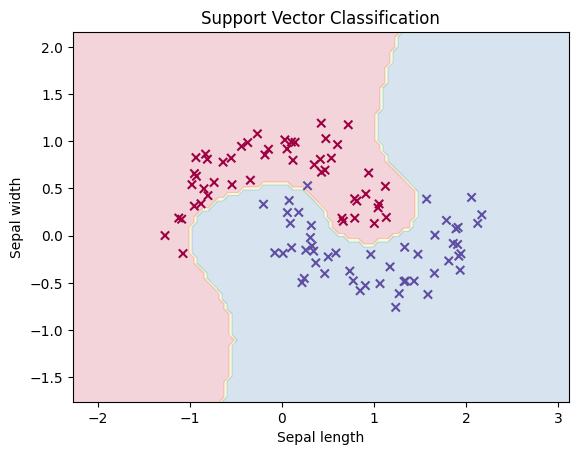

In [32]:
plotSVC("Support Vector Classification", polynomial_svm_clf, X, y, bins=100, marker='x')

In [33]:
'''
    -----------------------------------------------------------------------------------------------------------------
    Polynomial Kernel: Advantages because you can handle non-linearly separable data, without having to deal with combinatorial explosion.
    -----------------------------------------------------------------------------------------------------------------
    It uses a kernel trick.
    -----------------------------------------------------------------------------------------------------------------
    Implemented using the SVC class
    -----------------------------------------------------------------------------------------------------------------
'''

'\n    -----------------------------------------------------------------------------------------------------------------\n    Polynomial Kernel: Advantages because you can handle non-linearly separable data, without having to deal with combinatorial explosion.\n    -----------------------------------------------------------------------------------------------------------------\n    It uses a kernel trick.\n    -----------------------------------------------------------------------------------------------------------------\n    Implemented using the SVC class\n    -----------------------------------------------------------------------------------------------------------------\n'

In [37]:
from sklearn.svm import SVC

poly_kernel_svm_clf_3 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
])

poly_kernel_svm_clf_3.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

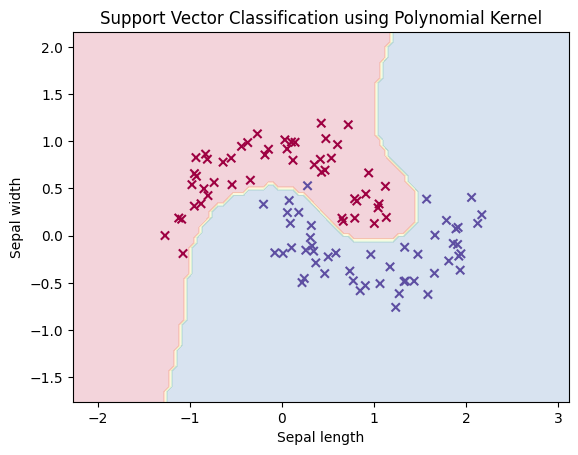

In [38]:
plotSVC("Support Vector Classification using Polynomial Kernel", poly_kernel_svm_clf_3, X, y, bins=100, marker='x')

In [39]:
poly_kernel_svm_clf_5 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=5, coef0=1, C=5))
])
poly_kernel_svm_clf_5.fit(X, y)

poly_kernel_svm_clf_10 = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
])
poly_kernel_svm_clf_10.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, degree=10, kernel='poly'))])

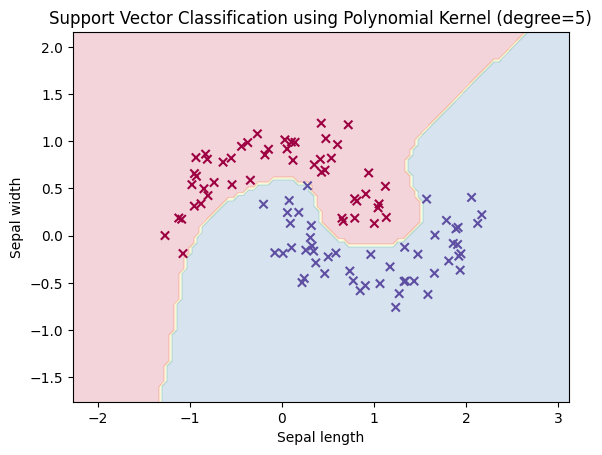

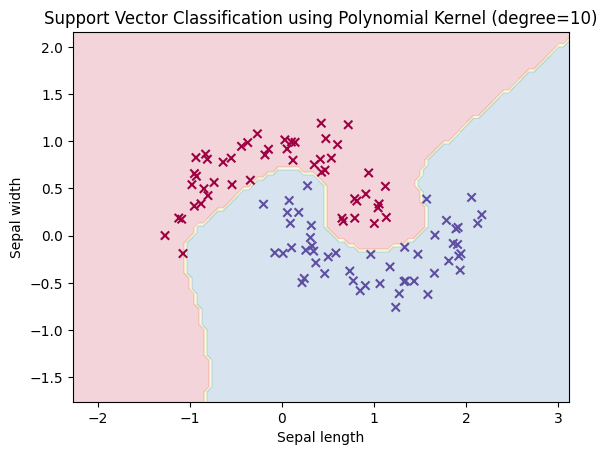

In [40]:
plotSVC("Support Vector Classification using Polynomial Kernel (degree=5)", poly_kernel_svm_clf_5, X, y, bins=100, marker='x')
plotSVC("Support Vector Classification using Polynomial Kernel (degree=10)", poly_kernel_svm_clf_10, X, y, bins=100, marker='x')